In [321]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

## 1. Background

In [322]:
# loading csv file
background = pd.read_csv("dataset/background202405.csv", sep=';')
background.info()

# checking data distribution of the age coloum
background['leeftijd'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11970 entries, 0 to 11969
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   nomem_encr     11970 non-null  int64 
 1   nohouse_encr   11970 non-null  int64 
 2   wave           11970 non-null  int64 
 3   geslacht       11970 non-null  int64 
 4   gender         11970 non-null  int64 
 5   positie        11970 non-null  int64 
 6   gebjaar        11970 non-null  int64 
 7   leeftijd       11970 non-null  int64 
 8   lftdcat        11970 non-null  int64 
 9   lftdhhh        11970 non-null  object
 10  aantalhh       11970 non-null  int64 
 11  aantalki       11970 non-null  int64 
 12  partner        11970 non-null  int64 
 13  burgstat       11970 non-null  int64 
 14  woonvorm       11970 non-null  int64 
 15  woning         11970 non-null  int64 
 16  sted           11970 non-null  object
 17  belbezig       11970 non-null  object
 18  brutoink       11970 non-n

count    11970.000000
mean        42.956140
std         23.046441
min          0.000000
25%         24.000000
50%         43.000000
75%         62.000000
max        124.000000
Name: leeftijd, dtype: float64

In [323]:
background.head()

,nomem_encr,nohouse_encr,wave,geslacht,gender,positie,gebjaar,leeftijd,lftdcat,lftdhhh,...,nettocat,brutohh_f,nettohh_f,oplzon,oplmet,oplcat,doetmee,werving,herkomstgroep,simpc
0,800001,535121,202405,1,1,1,1961,62,6,62,...,5,"5501,78671301875",3709,5,5,5,0,10,201,0
1,800002,521889,202405,1,1,1,1976,47,5,47,...,7,6780,4380,4,4,4,1,10,0,0
2,800009,559835,202405,1,999,1,1955,69,7,69,...,7,"6762,42225133551",4650,5,5,5,1,7,0,0
3,800015,568664,202405,1,999,1,1962,61,6,61,...,7,5879,4242,6,6,6,1,3,102,0
4,800028,542295,202405,1,1,1,1950,73,7,73,...,6,"4582,6727773595",3600,6,3,3,1,10,0,0


In [324]:
# filtering colomns
background_updated = background[['nomem_encr', 'geslacht', 'leeftijd', 'burgstat', 
         'woonvorm', 'sted', 'belbezig', 'nettocat', 
         'oplmet', 'herkomstgroep']]

# changing colomn names
background_updated.columns = [
    'nomem_encr',            # nomem_encr
    'gender',                # geslacht
    'age',                   # leeftijd
    'civil_status',          # burgstat
    'domestic_situation',    # woonvorm
    'urbanization',          # sted
    'occupation',            # belbezig
    'net_monthly_income',    # nettocat
    'highest_education',     # oplmet
    'origin'                 # herkomstgroep
]

In [395]:
background_updated.head(20)

,nomem_encr,gender,age,civil_status,domestic_situation,urbanization,occupation,net_monthly_income,highest_education,origin
0,800001,1,62,5,2,4,1,5.0,5,201
1,800002,1,47,1,3,4,1,7.0,4,0
2,800009,1,69,1,2,5,9,7.0,5,0
3,800015,1,61,1,3,1,1,7.0,6,102
4,800028,1,73,1,2,2,9,6.0,3,0
5,800034,2,34,5,4,2,10,2.0,2,0
6,800057,1,49,5,3,1,1,9.0,6,0
7,800074,1,13,5,3,2,7,0.0,8,0
8,800085,1,47,1,2,5,1,7.0,4,0
9,800091,1,40,5,2,4,1,4.0,4,0


In [325]:
unique_counts = background_updated[background_updated.columns].nunique()
print(unique_counts)

nomem_encr            11970
gender                    3
age                     103
civil_status              5
domestic_situation        5
urbanization              7
occupation               15
net_monthly_income       16
highest_education         9
origin                    6
dtype: int64


In [326]:
background_updated = background_updated.replace(' ', np.nan)
print('Overall missing values: ', background_updated.isnull().sum().sum())
print(background_updated.isnull().sum().to_string())

Overall missing values:  4003
nomem_encr               0
gender                   0
age                      0
civil_status             0
domestic_situation       0
urbanization            37
occupation               3
net_monthly_income     114
highest_education        0
origin                3849


In [327]:
# Null value check
print(background_updated.isnull().sum())
print()

for col in ["urbanization", "occupation", "net_monthly_income", "origin"]:
    col_missing = (background_updated[col].isnull().sum() / background_updated.shape[0]) * 100
    print(f"Proportion of missing data of {col}:")
    print(round(col_missing,2))
print()

nomem_encr               0
gender                   0
age                      0
civil_status             0
domestic_situation       0
urbanization            37
occupation               3
net_monthly_income     114
highest_education        0
origin                3849
dtype: int64

Proportion of missing data of urbanization:
0.31
Proportion of missing data of occupation:
0.03
Proportion of missing data of net_monthly_income:
0.95
Proportion of missing data of origin:
32.16



In [329]:
# Missing value imputation
# Create imputers
mode_imputer = SimpleImputer(strategy='most_frequent')
median_imputer = SimpleImputer(strategy='median')

# Impute missing values in numeric fields with median
background_updated['net_monthly_income'] = median_imputer.fit_transform(background_updated[['net_monthly_income']])

# Impute missing values in categorical fields with mode
background_updated['urbanization'] = mode_imputer.fit_transform(background_updated[['urbanization']]).ravel()
background_updated['occupation'] = mode_imputer.fit_transform(background_updated[['occupation']]).ravel()
background_updated['origin'] = mode_imputer.fit_transform(background_updated[['origin']]).ravel()

# Replacing the missing value in 'origin' with 'Unknown'
background_updated['origin'].fillna('Unknown', inplace=True)

In [330]:
# Null value check
print(background_updated.isnull().sum())
print()

for col in ["urbanization", "occupation", "net_monthly_income", "origin"]:
    col_missing = (background_updated[col].isnull().sum() / background_updated.shape[0]) * 100
    print(f"Proportion of missing data of {col}:")
    print(round(col_missing,2))
print()

nomem_encr            0
gender                0
age                   0
civil_status          0
domestic_situation    0
urbanization          0
occupation            0
net_monthly_income    0
highest_education     0
origin                0
dtype: int64

Proportion of missing data of urbanization:
0.0
Proportion of missing data of occupation:
0.0
Proportion of missing data of net_monthly_income:
0.0
Proportion of missing data of origin:
0.0



In [331]:
# generate an updated csv file
background_updated.to_csv('dataset/background_updated.csv', index=False)

background_updated.info()
background_updated['age'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11970 entries, 0 to 11969
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   nomem_encr          11970 non-null  int64  
 1   gender              11970 non-null  int64  
 2   age                 11970 non-null  int64  
 3   civil_status        11970 non-null  int64  
 4   domestic_situation  11970 non-null  int64  
 5   urbanization        11970 non-null  object 
 6   occupation          11970 non-null  object 
 7   net_monthly_income  11970 non-null  float64
 8   highest_education   11970 non-null  int64  
 9   origin              11970 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 935.3+ KB


count    11970.000000
mean        42.956140
std         23.046441
min          0.000000
25%         24.000000
50%         43.000000
75%         62.000000
max        124.000000
Name: age, dtype: float64

## 2. Health

In [332]:
health = pd.read_csv("dataset/health.csv", sep=';')
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6058 entries, 0 to 6057
Columns: 209 entries, nomem_encr to ch23p259
dtypes: int64(4), object(205)
memory usage: 9.7+ MB


In [333]:
# filtering coloums
health_updated = health[['nomem_encr', 'ch23p004', 'ch23p018', 
                         'ch23p020', 'ch23p021', 'ch23p022']]

# change colomn names
health_updated.columns = ['nomem_encr', 'self_assessed_health', 'long_standing_disease', 
                          'daily_impact_of_health', 'social_impact_of_health', 'work_impact_of_health']



In [334]:
health_updated = health_updated.replace(' ', np.nan)
print('Overall missing values: ', health_updated.isnull().sum().sum())
print(health_updated.isnull().sum().to_string())

Overall missing values:  50
nomem_encr                  0
self_assessed_health        0
long_standing_disease      12
daily_impact_of_health     12
social_impact_of_health    13
work_impact_of_health      13


In [335]:
# Null value check
print(health_updated.isnull().sum())
print()

for col in ["long_standing_disease", "daily_impact_of_health", "social_impact_of_health", "work_impact_of_health"]:
    col_missing = (health_updated[col].isnull().sum() / health_updated.shape[0]) * 100
    print(f"Proportion of missing data of {col}:")
    print(round(col_missing,2))
print()

nomem_encr                  0
self_assessed_health        0
long_standing_disease      12
daily_impact_of_health     12
social_impact_of_health    13
work_impact_of_health      13
dtype: int64

Proportion of missing data of long_standing_disease:
0.2
Proportion of missing data of daily_impact_of_health:
0.2
Proportion of missing data of social_impact_of_health:
0.21
Proportion of missing data of work_impact_of_health:
0.21



In [336]:
unique_counts = health_updated[health_updated.columns].nunique()
print(unique_counts)

nomem_encr                 6058
self_assessed_health          5
long_standing_disease         2
daily_impact_of_health        5
social_impact_of_health       5
work_impact_of_health         5
dtype: int64


In [337]:
# Missing value imputation
# Impute missing values in categorical fields with mode
mode_imputer = SimpleImputer(strategy='most_frequent')
health_updated['long_standing_disease'] = mode_imputer.fit_transform(health_updated[['long_standing_disease']]).ravel()
health_updated['daily_impact_of_health'] = mode_imputer.fit_transform(health_updated[['daily_impact_of_health']]).ravel()
health_updated['social_impact_of_health'] = mode_imputer.fit_transform(health_updated[['social_impact_of_health']]).ravel()
health_updated['work_impact_of_health'] = mode_imputer.fit_transform(health_updated[['work_impact_of_health']]).ravel()

In [338]:
# Null value check
print(health_updated.isnull().sum())
print()

for col in ["long_standing_disease", "daily_impact_of_health", "social_impact_of_health", "work_impact_of_health"]:
    col_missing = (health_updated[col].isnull().sum() / health_updated.shape[0]) * 100
    print(f"Proportion of missing data of {col}:")
    print(round(col_missing,2))
print()

nomem_encr                 0
self_assessed_health       0
long_standing_disease      0
daily_impact_of_health     0
social_impact_of_health    0
work_impact_of_health      0
dtype: int64

Proportion of missing data of long_standing_disease:
0.0
Proportion of missing data of daily_impact_of_health:
0.0
Proportion of missing data of social_impact_of_health:
0.0
Proportion of missing data of work_impact_of_health:
0.0



In [339]:
# generate a updated csv file
health_updated.to_csv('dataset/health_updated.csv', index=False)

## 3. Personality

**1. Target Variable Calculation**

In [340]:
# calculate swls score and generate new csv file
personality = pd.read_csv("dataset/personality.csv", sep=';', low_memory=False)

# filtering coloums
personality_updated = personality[['nomem_encr', 'cp24p014', 'cp24p015', 
                                   'cp24p016', 'cp24p017', 'cp24p018']]

In [341]:
personality_updated = personality_updated.replace(' ', np.nan)
print('Overall missing values: ', personality_updated.isnull().sum().sum())
print(personality_updated.isnull().sum().to_string())

Overall missing values:  10
nomem_encr    0
cp24p014      2
cp24p015      2
cp24p016      2
cp24p017      2
cp24p018      2


In [342]:
# Missing value imputation
# Impute missing values in numeric fields with median
median_imputer = SimpleImputer(strategy='median')
personality_updated['cp24p014'] = median_imputer.fit_transform(personality_updated[['cp24p014']])
personality_updated['cp24p015'] = median_imputer.fit_transform(personality_updated[['cp24p015']])
personality_updated['cp24p016'] = median_imputer.fit_transform(personality_updated[['cp24p016']])
personality_updated['cp24p017'] = median_imputer.fit_transform(personality_updated[['cp24p017']])
personality_updated['cp24p018'] = median_imputer.fit_transform(personality_updated[['cp24p018']])
print(personality_updated.isnull().sum().to_string())

nomem_encr    0
cp24p014      0
cp24p015      0
cp24p016      0
cp24p017      0
cp24p018      0


In [343]:
# Calculating the SWLS score
columns_to_sum = ['cp24p014', 'cp24p015', 'cp24p016', 'cp24p017', 'cp24p018']
personality_updated['swls_score'] = personality_updated[columns_to_sum].sum(axis=1)
personality_updated.head()

,nomem_encr,cp24p014,cp24p015,cp24p016,cp24p017,cp24p018,swls_score
0,800002,6.0,6.0,6.0,6.0,5.0,29.0
1,800009,4.0,5.0,5.0,6.0,3.0,23.0
2,800015,4.0,4.0,5.0,5.0,4.0,22.0
3,800028,6.0,6.0,6.0,6.0,5.0,29.0
4,800034,4.0,1.0,3.0,2.0,4.0,14.0


In [344]:
# Only keep the index column and the newly generated 'swls_score' column
# The 'nomem_encr' column is used as the index and the 'swls_score' column is used as the data column
swls_score = personality_updated[['nomem_encr', 'swls_score']]
swls_score.set_index('nomem_encr', inplace=True)
swls_score.to_csv('dataset/swls_score.csv')

**2. Big Five Score Calculation**

**(1) Data Filtering**

In [345]:
columns_to_select = ['nomem_encr']
for col in personality.columns:
    if col.startswith('cp24p') and col[5:].isdigit() and 20 <= int(col[5:]) <= 69:
        columns_to_select.append(col)

big_five = personality[columns_to_select]

big_five.columns = ['nomem_encr', 
'q1_1+', 'q2_2-', 'q3_3+', 'q4_4-', 'q5_5+', 
'q6_1-', 'q7_2+', 'q8_3-', 'q9_4+', 'q10_5-',
'q11_1+', 'q12_2-', 'q13_3+', 'q14_4-', 'q15_5+',
'q16_1-', 'q17_2+', 'q18_3-', 'q19_4+', 'q20_5-',
'q21_1+', 'q22_2-', 'q23_3+', 'q24_4-', 'q25_5+',
'q26_1-', 'q27_2+', 'q28_3-', 'q29_4-', 'q30_5-',
'q31_1+', 'q32_2-', 'q33_3+', 'q34_4-', 'q35_5+',
'q36_1-', 'q37_2+', 'q38_3-', 'q39_4-', 'q40_5+', 
'q41_1+', 'q42_2+', 'q43_3+', 'q44_4-', 'q45_5+',       
'q46_1-', 'q47_2+', 'q48_3+', 'q49_4-', 'q50_5+']

big_five.to_csv('dataset/big_five.csv', index=False)

In [346]:
big_five = big_five.replace(' ', np.nan)
print('Overall missing values: ', big_five.isnull().sum().sum())
print(big_five.isnull().sum().to_string())

Overall missing values:  1090
nomem_encr     0
q1_1+         11
q2_2-         11
q3_3+         11
q4_4-         11
q5_5+         11
q6_1-         11
q7_2+         11
q8_3-         11
q9_4+         11
q10_5-        11
q11_1+        18
q12_2-        18
q13_3+        18
q14_4-        18
q15_5+        18
q16_1-        18
q17_2+        18
q18_3-        18
q19_4+        18
q20_5-        18
q21_1+        25
q22_2-        25
q23_3+        25
q24_4-        25
q25_5+        25
q26_1-        25
q27_2+        25
q28_3-        25
q29_4-        25
q30_5-        25
q31_1+        27
q32_2-        27
q33_3+        27
q34_4-        27
q35_5+        27
q36_1-        27
q37_2+        27
q38_3-        27
q39_4-        27
q40_5+        27
q41_1+        28
q42_2+        28
q43_3+        28
q44_4-        28
q45_5+        28
q46_1-        28
q47_2+        28
q48_3+        28
q49_4-        28
q50_5+        28


In [347]:
big_five.head()

,nomem_encr,q1_1+,q2_2-,q3_3+,q4_4-,q5_5+,q6_1-,q7_2+,q8_3-,q9_4+,...,q41_1+,q42_2+,q43_3+,q44_4-,q45_5+,q46_1-,q47_2+,q48_3+,q49_4-,q50_5+
0,800002,2,2,4,3,3,4,4,3,4,...,3,3,2,3,2,3,2,4,1,3
1,800009,3,2,5,4,5,3,5,1,4,...,3,4,3,3,5,3,4,5,1,5
2,800015,1,1,5,3,4,4,5,1,4,...,1,5,5,3,5,5,3,4,2,2
3,800028,2,2,3,1,4,3,4,2,4,...,3,4,4,2,4,2,3,4,1,3
4,800034,4,1,3,5,4,3,4,1,2,...,1,4,3,4,3,4,4,3,4,3


**(2) Score Calculation**
https://ipip.ori.org/New_IPIP-50-item-scale.htm

In [348]:
big_five = pd.read_csv("dataset/big_five.csv", low_memory=False)

for col in big_five.columns:
    if col.startswith('q') and '_' in col:
        # Convert to numeric, coercing errors to NaN
        big_five[col] = pd.to_numeric(big_five[col], errors='coerce')
        # Fill missing values with the median of the column
        median_value = big_five[col].median()
        big_five[col].fillna(median_value, inplace=True)

In [349]:
# Initialize a new DataFrame to store Big Five scores
big_five_scores = pd.DataFrame()
big_five_scores['nomem_encr'] = big_five['nomem_encr'] 

# Initialize columns for each Big Five trait
big_five_scores['extraversion'] = 0
big_five_scores['agreeableness'] = 0
big_five_scores['conscientiousness'] = 0
big_five_scores['emotional_stability'] = 0
big_five_scores['intellect_imagination'] = 0

# Loop through all columns in the big_five DataFrame
for col in big_five.columns:
    if col.startswith('q') and '_' in col:  # Ensure column starts with 'q' and contains '_'
        parts = col.split('_')
        trait_num = int(parts[1][0])  # Get the trait number (1-5)
        sign = parts[1][-1]  # Get the sign ('+' or '-')

        # Define a mapping from trait number to trait name
        trait_map = {
            1: 'extraversion',
            2: 'agreeableness',
            3: 'conscientiousness',
            4: 'emotional_stability',
            5: 'intellect_imagination'
        }

        # Check if column is in the mapping
        if trait_num in trait_map:
            trait = trait_map[trait_num]
            if sign == '+':
                big_five_scores[trait] += big_five[col]
            elif sign == '-':
                big_five_scores[trait] -= big_five[col]

big_five_scores.to_csv('dataset/big_five_scores.csv', index=False)

In [350]:
big_five_scores.head()

,nomem_encr,extraversion,agreeableness,conscientiousness,emotional_stability,intellect_imagination
0,800002,-2.0,7.0,12.0,-7.0,15.0
1,800009,1.0,13.0,18.0,-11.0,25.0
2,800015,-11.0,18.0,23.0,-12.0,15.0
3,800028,2.0,14.0,13.0,-6.0,19.0
4,800034,-7.0,19.0,15.0,-28.0,13.0


## 4. Social Integration

In [398]:
social_integration = pd.read_csv("dataset/social_integration.csv", sep=';')
social_integration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5991 entries, 0 to 5990
Columns: 450 entries, nomem_encr to cs23p415
dtypes: int64(8), object(442)
memory usage: 20.6+ MB


In [399]:
# Filtering
social_integration_updated = social_integration[['nomem_encr', 'cs23p001',
                                                 
            'cs23p494', 'cs23p495', 'cs23p517', 'cs23p093', 'cs23p094', 
            'cs23p568', 'cs23p516', 'cs23p496',  # visit concerts
                                         
            'cs23p101', 'cs23p100', 'cs23p497', 'cs23p098', 'cs23p099', 
            'cs23p499', 'cs23p569', 'cs23p572', 'cs23p570', 'cs23p571', # cultural activities                                   
            
            'cs23p102', 'cs23p103',   # holiday frequency
                                                 
            'cs23p105',  # sports hours per week
            'cs23p379',  # average tv time in minutes per day
            'cs23p623',  # average podcast time in minutes per day
            'cs23p624',  # audiobooks per month 
            'cs23p131',  # books per month 
                                                 
            'cs23p160', 'cs23p161', 'cs23p162', 'cs23p164',
            'cs23p165', 'cs23p166', 'cs23p167', 'cs23p500',                                     
            'cs23p169', 'cs23p171', 'cs23p172', 'cs23p173',   # entertainments days per week                                   
             
            'cs23p174', 'cs23p175', 'cs23p176', 'cs23p177',
            'cs23p178', 'cs23p179', 'cs23p180', 'cs23p181',                                     
            'cs23p182', 'cs23p183', 'cs23p184', 'cs23p185',
            'cs23p186',  # relaxing activities days per week                                   
                 
            'cs23p267', 'cs23p268', 'cs23p269', 'cs23p270',
            'cs23p437', 'cs23p438', 'cs23p276', 'cs23p277',                                     
            'cs23p278', 'cs23p279', 'cs23p282',  # online activities hours per week
                                                 
            'cs23p439', 'cs23p440', 'cs23p487', 
            'cs23p280', 'cs23p443', 'cs23p281',  # online activities hours per week                                       
                                                 
            'cs23p283',   # satisfaction of social contacts                                  
            
            'cs23p284', 'cs23p285', 'cs23p286', 
            'cs23p287', 'cs23p288', 'cs23p289',  # social support feeling
                                                 
            'cs23p634', 'cs23p635', 'cs23p636',                                       
            'cs23p290', 'cs23p291', 'cs23p292'  # frequency with family/neighborhood/others                                      
            ]]

# Changing column names
social_integration_updated.columns = [
    'nomem_encr',            # nomem_encr
    'leisure_time_satisfaction',          # numerical
    
    'theatre', 'cabaret', 'dance_performance', 'classical_concert', 'opera', 
    'musical', 'pop_festival', 'house_party',  # frequency visit concerts // ordered categorical

    'museum', 'art_gallery', 'library', 'cinema', 'film_event', 
    'food_event', 'fair', 'flea_market', 'zoo', 'theme_park', # frequency cultural activities // ordered categorical                                  

    'holiday_within_the_Netherlands', 'holiday_abroad',   # holiday frequency // ordered categorical   
  
    'sports_hours',  # sports hours per week // numerical
    'tv_time',  # average tv time in minutes per day // numerical
    'podcast_time',  # average podcast time in minutes per day // numerical
    'audiobooks',  # audiobooks per month // numerical
    'books',  # books per month // numerical

    'musical_instrument', 'singing_group', 'gardening', 'handicrafts',
    'photography', 'caring_for_animals', 'handwork', 'watching_at_home',                                     
    'reading', 'collection', 'workshop', 'acting',   # entertainments days per week // numerical                                  

    'equestrian_sport', 'motor_sport', 'mechanical_work', 'card_games',
    'billiards_or_darts', 'pigeon_keeping', 'dining_out', 'cooking',                                     
    'music_radio', 'fishing', 'shopping', 'dancing',
    'boating',  # relaxing activities days per week // numerical                                     

    'email', 'searching_information', 'comparing_products', 'purchasing',
    'watching_online', 'downloading', 'internet_banking', 'gaming',                                     
    'reading_online', 'newsgroups', 'other_online_activities',  # online activities hours per week // numerical  

    'social_media_hours', 'blog_hours', 'posting_hours', 
    'chatting_hours', 'dating_websites_hours', 'forum_hours',  # online activities hours per week // numerical                                        

    'social_contacts_satisfaction',   # satisfaction of social contacts // numerical                                   

    'emptiness', 'people_to_count_on_when_misfortune', 'people_to_fully_rely_on', 
    'closely_connected_people', 'miss_having_people_around', 'feel_deserted',  # social support feeling // categorical

    'family_day', 'neighborhood_day', 'others_day',                                       
    'family_evening', 'neighborhood_evening', 'others_evening'  # frequency with family/neighborhood/others // categorical                                     
]


In [400]:
social_integration_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5991 entries, 0 to 5990
Data columns (total 82 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   nomem_encr                          5991 non-null   int64 
 1   leisure_time_satisfaction           5991 non-null   int64 
 2   theatre                             5991 non-null   object
 3   cabaret                             5991 non-null   object
 4   dance_performance                   5991 non-null   object
 5   classical_concert                   5991 non-null   object
 6   opera                               5991 non-null   object
 7   musical                             5991 non-null   object
 8   pop_festival                        5991 non-null   object
 9   house_party                         5991 non-null   object
 10  museum                              5991 non-null   object
 11  art_gallery                         5991 non-null   obje

In [401]:
# Replace missing values with NaN
social_integration_updated = social_integration_updated.replace(' ', np.nan)
print('Overall missing values: ', social_integration_updated.isnull().sum().sum())
print(social_integration_updated.isnull().sum().to_string())

Overall missing values:  10807
nomem_encr                               0
leisure_time_satisfaction                0
theatre                                 14
cabaret                                 14
dance_performance                       14
classical_concert                       14
opera                                   14
musical                                 14
pop_festival                            14
house_party                             14
museum                                  14
art_gallery                             14
library                                 14
cinema                                  14
film_event                              14
food_event                              14
fair                                    14
flea_market                             14
zoo                                     14
theme_park                              14
holiday_within_the_Netherlands          15
holiday_abroad                          15
sports_hours           

In [403]:
# Null value check
print(social_integration_updated.isnull().sum())
print()

for col in ["sports_hours", "tv_time", "podcast_time", "social_media_hours"]:
    col_missing = (social_integration_updated[col].isnull().sum() / social_integration_updated.shape[0]) * 100
    print(f"Proportion of missing data of {col}:")
    print(round(col_missing,2))
print()


nomem_encr                    0
leisure_time_satisfaction     0
theatre                      14
cabaret                      14
dance_performance            14
                             ..
neighborhood_day             70
others_day                   70
family_evening               70
neighborhood_evening         70
others_evening               70
Length: 82, dtype: int64

Proportion of missing data of sports_hours:
45.42
Proportion of missing data of tv_time:
5.21
Proportion of missing data of podcast_time:
79.0
Proportion of missing data of social_media_hours:
1.39



In [355]:
# Fill missing values in each specified column with 0
social_integration_updated['sports_hours'] = social_integration_updated['sports_hours'].fillna(0)
social_integration_updated['tv_time'] = social_integration_updated['tv_time'].fillna(0)
social_integration_updated['podcast_time'] = social_integration_updated['podcast_time'].fillna(0)

In [356]:
print('Overall missing values: ', social_integration_updated.isnull().sum().sum())
print(social_integration_updated.isnull().sum())

Overall missing values:  3041
nomem_encr                    0
leisure_time_satisfaction     0
theatre                      14
cabaret                      14
dance_performance            14
                             ..
neighborhood_day             70
others_day                   70
family_evening               70
neighborhood_evening         70
others_evening               70
Length: 82, dtype: int64


In [358]:
# Missing value imputation
mode_imputer = SimpleImputer(strategy='most_frequent')

# Fill categorical columns with mode
categorical_columns = [
    'theatre', 'cabaret', 'dance_performance', 'classical_concert', 'opera', 
    'musical', 'pop_festival', 'house_party',  # frequency visit concerts // ordered categorical

    'museum', 'art_gallery', 'library', 'cinema', 'film_event', 
    'food_event', 'fair', 'flea_market', 'zoo', 'theme_park', # frequency cultural activities // ordered categorical                                  

    'holiday_within_the_Netherlands', 'holiday_abroad',   # holiday frequency // ordered categorical   
  
    'emptiness', 'people_to_count_on_when_misfortune', 'people_to_fully_rely_on', 
    'closely_connected_people', 'miss_having_people_around', 'feel_deserted',  # social support feeling // categorical

    'family_day', 'neighborhood_day', 'others_day',                                       
    'family_evening', 'neighborhood_evening', 'others_evening'  # frequency with family/neighborhood/others // categorical                                 
] 

social_integration_updated[categorical_columns] = mode_imputer.fit_transform(social_integration_updated[categorical_columns])

In [359]:
# Fill numerical columns with median
numerical_columns = [   
    'leisure_time_satisfaction',          # numerical

    'sports_hours',  # sports hours per week // numerical
    'tv_time',  # average tv time in minutes per day // numerical
    'podcast_time',  # average podcast time in minutes per day // numerical
    'audiobooks',  # audiobooks per month // numerical
    'books',  # books per month // numerical

    'musical_instrument', 'singing_group', 'gardening', 'handicrafts',
    'photography', 'caring_for_animals', 'handwork', 'watching_at_home',                                     
    'reading', 'collection', 'workshop', 'acting',   # entertainments days per week // numerical                                  

    'equestrian_sport', 'motor_sport', 'mechanical_work', 'card_games',
    'billiards_or_darts', 'pigeon_keeping', 'dining_out', 'cooking',                                     
    'music_radio', 'fishing', 'shopping', 'dancing',
    'boating',  # relaxing activities days per week // numerical                                     

    'email', 'searching_information', 'comparing_products', 'purchasing',
    'watching_online', 'downloading', 'internet_banking', 'gaming',                                     
    'reading_online', 'newsgroups', 'other_online_activities',  # online activities hours per week // numerical  

    'social_media_hours', 'blog_hours', 'posting_hours', 
    'chatting_hours', 'dating_websites_hours', 'forum_hours',  # online activities hours per week // numerical                                        

    'social_contacts_satisfaction',   # satisfaction of social contacts // numerical                                   
] 

# Convert columns to numeric, coercing errors to NaN
for col in numerical_columns:
    social_integration_updated[col] = pd.to_numeric(social_integration_updated[col].replace(',', '.'), errors='coerce')

# Apply the median imputer
median_imputer = SimpleImputer(strategy='median')
social_integration_updated[numerical_columns] = median_imputer.fit_transform(social_integration_updated[numerical_columns])

In [360]:
print('Overall missing values: ', social_integration_updated.isnull().sum().sum())
print(social_integration_updated.isnull().sum())

Overall missing values:  0
nomem_encr                   0
leisure_time_satisfaction    0
theatre                      0
cabaret                      0
dance_performance            0
                            ..
neighborhood_day             0
others_day                   0
family_evening               0
neighborhood_evening         0
others_evening               0
Length: 82, dtype: int64


In [361]:
# Save to a new CSV file
social_integration_updated.to_csv('dataset/social_integration_updated.csv', index=False)
social_integration_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5991 entries, 0 to 5990
Data columns (total 82 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   nomem_encr                          5991 non-null   int64  
 1   leisure_time_satisfaction           5991 non-null   float64
 2   theatre                             5991 non-null   object 
 3   cabaret                             5991 non-null   object 
 4   dance_performance                   5991 non-null   object 
 5   classical_concert                   5991 non-null   object 
 6   opera                               5991 non-null   object 
 7   musical                             5991 non-null   object 
 8   pop_festival                        5991 non-null   object 
 9   house_party                         5991 non-null   object 
 10  museum                              5991 non-null   object 
 11  art_gallery                         5991 no

## Merge data

In [407]:
# Only the individuals present in both social_integration and Personality will be included
personality_updated = pd.merge(swls_score, big_five_scores, on='nomem_encr', how='inner')
merged_data = pd.merge(personality_updated, social_integration_updated, on='nomem_encr', how='inner')
merged_data = pd.merge(merged_data, background_updated, on='nomem_encr', how='inner')
merged_data = pd.merge(merged_data, health_updated, on='nomem_encr', how='inner')
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4748 entries, 0 to 4747
Columns: 102 entries, nomem_encr to work_impact_of_health
dtypes: float64(7), int64(8), object(87)
memory usage: 3.7+ MB


In [385]:
# Grouping by age
group_50_and_below = merged_data[merged_data['age'] <= 50]
group_51_and_above = merged_data[merged_data['age'] > 50]

# View grouping results
print(f"Group 50 and below: {len(group_50_and_below)} rows")
print(f"Group 51 and above: {len(group_51_and_above)} rows")

# Save the grouped data as a CSV file
group_50_and_below.to_csv('dataset/group_50_and_below.csv', index=False)
group_above_50.to_csv('dataset/group_51_and_above.csv', index=False)

Group 50 and below: 1776 rows
Group 51 and above: 2972 rows


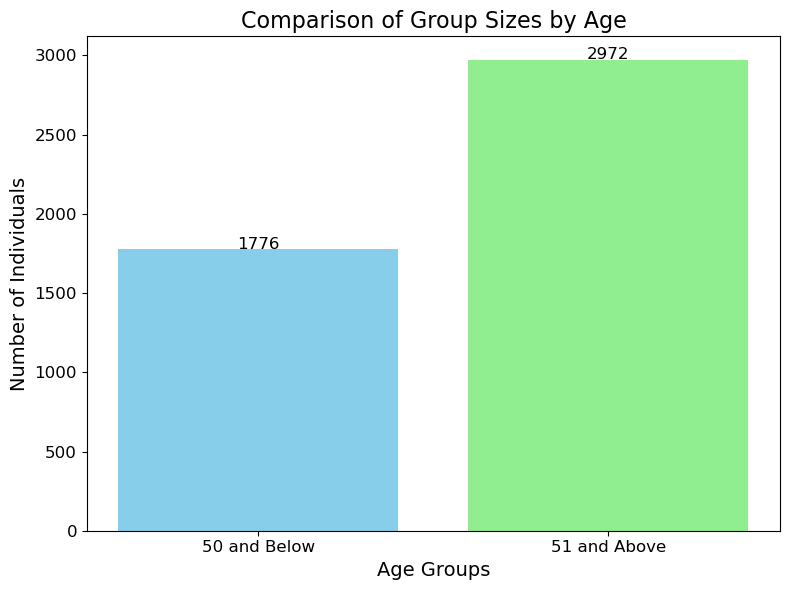

In [411]:
import matplotlib.pyplot as plt

# Calculate the number of individuals in each group
group_sizes = [len(group_50_and_below), len(group_51_and_above)]
group_labels = ['50 and Below', '51 and Above']

# Create the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(group_labels, group_sizes, color=['skyblue', 'lightgreen'])

# Add numerical labels on top of each bar
for bar, size in zip(bars, group_sizes):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5,  # Adjust position
             str(size), ha='center', fontsize=12)

# Customize chart appearance
plt.title('Comparison of Group Sizes by Age', fontsize=16)
plt.ylabel('Number of Individuals', fontsize=14)
plt.xlabel('Age Groups', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


Statistics of target variables for the group aged 50 and below:
count    1776.000000
mean       24.724099
std         5.604868
min         5.000000
25%        21.000000
50%        25.000000
75%        29.000000
max        35.000000
Name: swls_score, dtype: float64

Statistics of target variables for the group aged 51 and above:
count    2972.000000
mean       25.727120
std         5.534497
min         5.000000
25%        23.000000
50%        27.000000
75%        30.000000
max        35.000000
Name: swls_score, dtype: float64


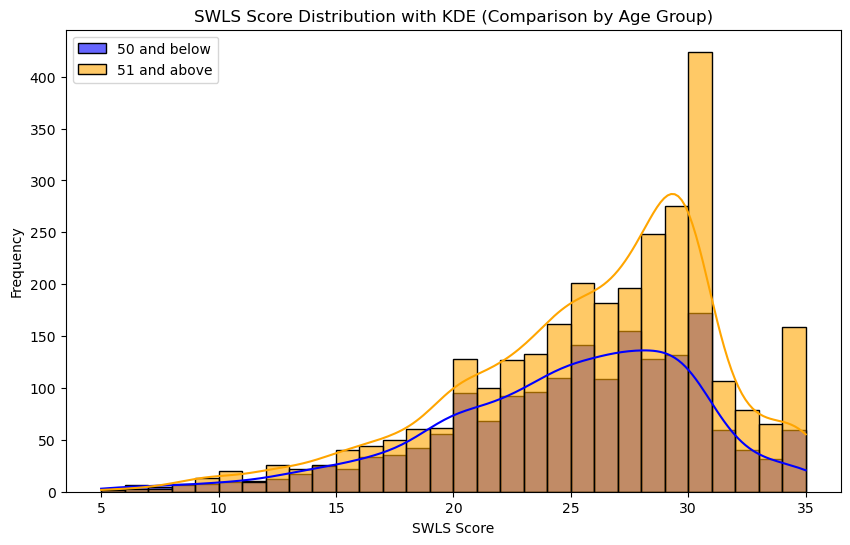

In [414]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# Descriptive statistics
print("Statistics of target variables for the group aged 50 and below:")
print(group_50_and_below['swls_score'].describe())
print("\nStatistics of target variables for the group aged 51 and above:")
print(group_51_and_above['swls_score'].describe())

# Plot histogram and kernel density plot of two groups in the same figure
plt.figure(figsize=(10, 6))

# 50 and below
sns.histplot(group_50_and_below['swls_score'], kde=True, bins=30, color='blue', alpha=0.6, label='50 and below')

# 51 and above 
sns.histplot(group_51_and_above['swls_score'], kde=True, bins=30, color='orange', alpha=0.6, label='51 and above')

# Add labels and titles
plt.xlabel('SWLS Score')
plt.ylabel('Frequency')
plt.title('SWLS Score Distribution with KDE (Comparison by Age Group)')
plt.legend()
plt.show()


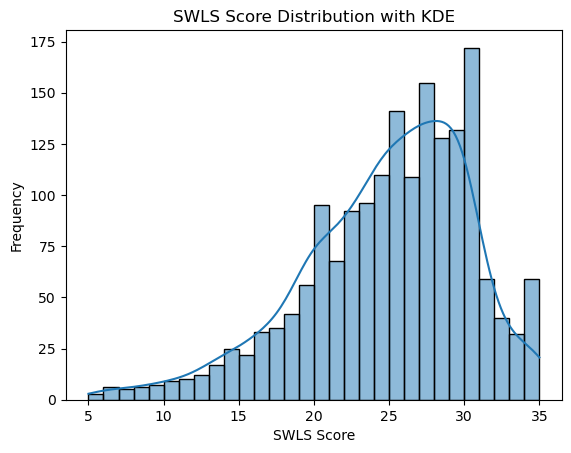

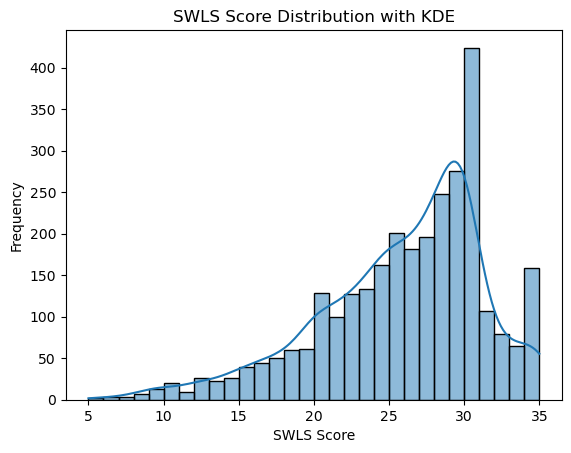

In [415]:
import seaborn as sns
sns.histplot(group_50_and_below.swls_score, kde=True, bins=30)
plt.xlabel('SWLS Score')
plt.ylabel('Frequency')
plt.title('SWLS Score Distribution with KDE')
plt.show()

sns.histplot(group_51_and_above.swls_score, kde=True, bins=30)
plt.xlabel('SWLS Score')
plt.ylabel('Frequency')
plt.title('SWLS Score Distribution with KDE')
plt.show()

In [ ]:
merged_data.to_csv('dataset/merged_data.csv', index=False)
merged_data.info()

In [409]:
# Only the individuals present in both social_integration and Personality will be included
personality_updated = pd.merge(swls_score, big_five_scores, on='nomem_encr', how='inner')
merged_data2 = pd.merge(personality_updated, background_updated, on='nomem_encr', how='inner')
merged_data2 = pd.merge(merged_data2, health_updated, on='nomem_encr', how='inner')

# Filter merged_data2 to only include rows present in merged_data
merged_data2 = merged_data2[merged_data2['nomem_encr'].isin(merged_data['nomem_encr'])]

# Save the filtered dataset to a CSV file
merged_data2.to_csv('dataset/merged_data2.csv', index=False)

merged_data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4748 entries, 0 to 4927
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   nomem_encr               4748 non-null   int64  
 1   swls_score               4748 non-null   float64
 2   extraversion             4748 non-null   float64
 3   agreeableness            4748 non-null   float64
 4   conscientiousness        4748 non-null   float64
 5   emotional_stability      4748 non-null   float64
 6   intellect_imagination    4748 non-null   float64
 7   gender                   4748 non-null   int64  
 8   age                      4748 non-null   int64  
 9   civil_status             4748 non-null   int64  
 10  domestic_situation       4748 non-null   int64  
 11  urbanization             4748 non-null   object 
 12  occupation               4748 non-null   object 
 13  net_monthly_income       4748 non-null   float64
 14  highest_education        4748